<h1><center>Multi-layer Perceptron</center></h1>

In this mini-project, we will implement a simple one hidden layer neural network from scratch.
Even if you will use deep learning libraries like Pytorch or Tensorflow later, implementing a network from scratch at least once is an extremely useful exercise, essential for designing and optimizing your own models effectively.


In [1]:
#!pip install numpy
#!pip install sklearn

# Imports of useful packages
import matplotlib # For the plots
import matplotlib.pyplot as plt 
import numpy as np # To perform operations on matrices efficiently


# We will use the sklearn library to compare our neural network to that 
# of a simpler approach like logistic regression

import sklearn 
import sklearn.datasets
import sklearn.linear_model

from math import exp,log

# To display plots inline and adjust the display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generating a dataset

Let's start by generating a dataset that we can play with. The scikit-learn machine learning library has a few useful data generators, saving us the trouble of writing the code ourselves. We will use the make_moons function, which creates a two-class dataset of two-dimensional examples in the shape of two half-moons: each of the half-moons corresponds to a class.

In [2]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(n_samples=300, noise=0.20)  # We create a dataset with 300 elements

 <font color='red'><b>Question 1.</b></font> Show the coordinates and labels of the first two elements of the dataset.



In [3]:
# You can use f-string as proposed below (https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)
print(f"The first coordinate point {X[0]} has a label {y[0]}")
print(f"The second coordinate point {X[1]} has a label {y[1]}")

The first coordinate point [ 0.21073485 -0.0159868 ] has a label 1
The second coordinate point [-0.82910413  0.65187765] has a label 0


We can display this dataset easily using Matplotlib using colors to make the labels appear $y$ : 

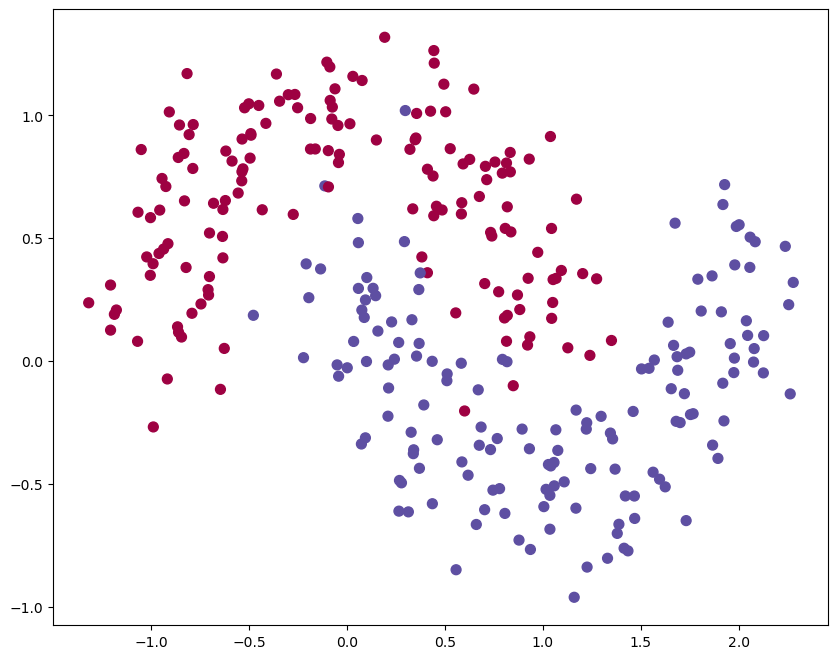

In [4]:
plt.scatter(X[:,0], X[:,1], s=50, c=y+1, cmap=plt.cm.Spectral)
plt.show()

The dataset we generated has two classes, represented by red and blue dots.

Our goal is to train a classifier that predicts the correct class from point coordinates $x_1$ et $x_2$. 

# Find the best line manually

In this part we will try to find the best line that separates our cloud of points manually.

<font color='red'><b>Question 2</b></font>  Creates a function that returns 1 if a coordinate point $(x_1,x_2$) is below the line with slope $a$ and the bias $b$.

In [5]:
def pred_linear(a: float, b: float, x1: float, x2: float):
    return 1 if x2 < a*x1+b else 0

It is important to be able to evaluate the performance of our approaches using metrics. Here, we will choose the accuracy which is simply the number of well-classified elements divided by the total number of elements. To learn more about classification metrics like precision, recall and their link with accuracy, you can consult the following excellent Wikipedia (if you plan to do Machine Learning later, the notion of precision/recall is a classic) https://en.wikipedia.org/wiki/Precision_and_recall

<font color='red'><b>Question 3.</b></font> Complete the following accuracy function. (1 Python line with the comprehension of a list)

In [6]:
def accuracy(y_true, y_pred):
    """
    Args:
        y_true (list[int]): A list of integers having values in {0,1} that contain the class labels
        y_pred (list[int]): A list of integers having values in {0,1} that contain the predictions of the model

    Returns:
        float: The Accuracy of the model
    
    Example:
    >>> accuracy([0,0,1], [0,1,1])
    0.666...
    """
    n = len(y_true)
    return sum([1 if y_true[i] == y_pred[i] else 0 for i in range(n)])/n

In [7]:
#### display function
def plot_decision_boundary(pred_func):
    """
    Shows the decision boundaries of a binary prediction function.
    """
    # Set grid dimensions and give some margin for display
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate the grid of points with a distance of h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Drawing the decision boundary
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Show contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

<font color='red'><b>Question 4.</b></font>  Play by hand with parameters $a$ and $b$ to obtain several linear decision boundaries and try to obtain at least 80% accuracy.



le score obtenu est de:  0.8633333333333333


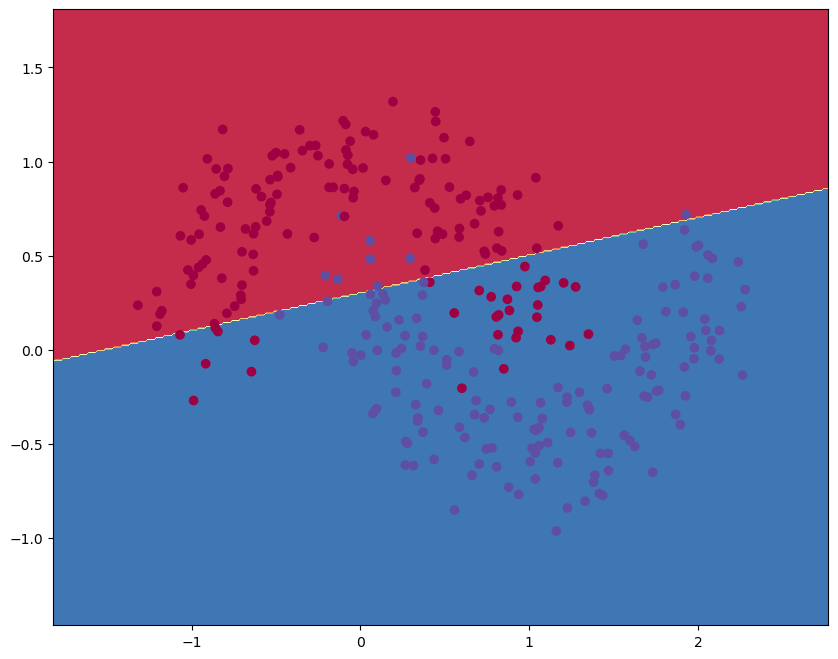

In [8]:
a = 0.2 
b = 0.3 
def prediction(A, a, b, func):
    return np.array([func(a=a, b=b, x1=x[0], x2=x[1]) for x in A])
plot_decision_boundary(lambda x: prediction(x, a, b, pred_linear))
print('le score obtenu est de: ', accuracy(y, prediction(X, a, b, pred_linear)))

# Logistic Regression

Scikit-learn has models such as logistic regression which can find the optimal parameters a and b:

In [9]:
classifier = sklearn.linear_model.LogisticRegressionCV()

 <font color='red'><b>Question 5.</b></font> Train this logistic regression model on the dataset (X,y). You can use the Scikit-learn documentation to see how to train a model on data: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
classifier.fit(X,y) #TODO (1 line)

LogisticRegressionCV()

Once the model is trained, it can be used to predict and draw the decision boundary:

le score obtenu est de:  0.8566666666666667


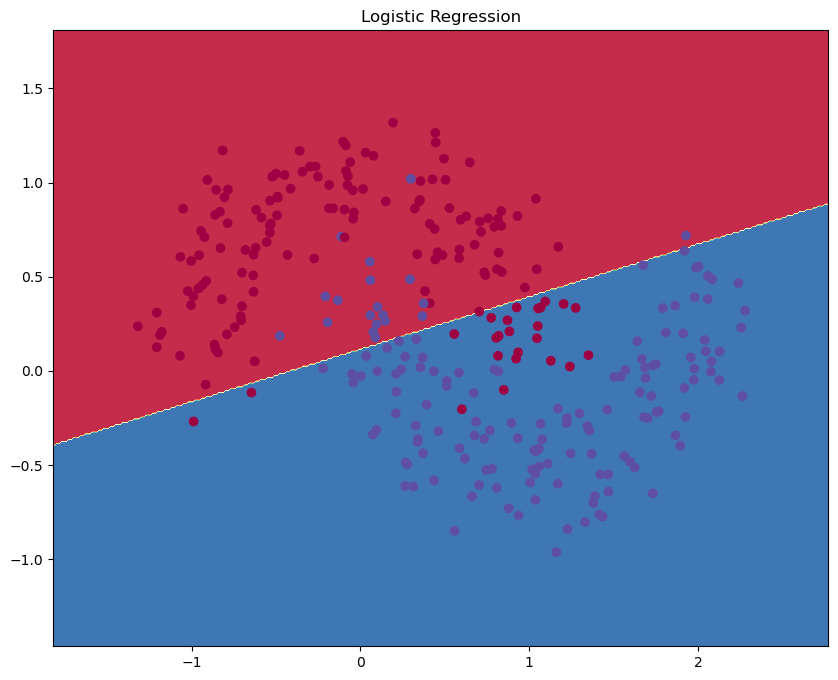

In [11]:
plot_decision_boundary(lambda x: classifier.predict(x))
plt.title("Logistic Regression")
print('le score obtenu est de: ', accuracy(y, classifier.predict(X)))

 <font color='red'><b>Question 6.</b></font> What do you observe? Was such a result predictable? What can we do to improve our predictions?

I observe that the result is good, 85.67% accuracy. 
which also means that 24.33% of data points are misclassified.
We can use a polynomial function. 
#TODO complete

<font color='red'><b>Bonus Question.</b></font> Find the coefficients $a, b$ obtained by Scikit-learn logistic regression.

In [12]:
# TODO find a and b coef
classifier.coef_

array([[ 1.28629317, -4.61074999]])

# Neural Networks

You will now create a neural network to solve the previous problem.

In [13]:
# We will reuse the same datasets as previously, be careful X and y will be global variables for the rest 
# (to be avoided in general, but simplifies the notations for this mini porject)
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)

 <font color='red'><b> Question 7</b></font> Complete the following variables and functions to code a **two-layer** neural network (1 hidden layer). The hidden layer will currently have **10 neurons** and we will use a learning rate of 3e-2.


In [14]:
# number of examples in the training set

N =  len(X)

# dimension of the input
d_input = 2

# dimension of the output
d_output = 2

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 10

# learning rate for the gradient descente algorithm
epsilon = 3e-2

 <font color='red'><b> Question 8</b></font> Complete the following function to generate the parameters of our neural network. For this you will use the random library to generate parameters in the interval [-0.5, 0.5] using the random.random() function.

In [15]:
import random

In [16]:
def init_model(d_input: int, d_hidden: int, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (int): dimension of the hidden layer
        d_output (int): dimension of the output

    Returns:
        dict: Dictionary containing 4 keys, the weights/biases (W1,b1) and (W2,b2) of the neural network.
        Each of these weights and biases are lists or list of lists of float.
    """
    # Initialization of random parameters
    random.seed(0)
    
    # random.random() Return the next random floating point number in the range 0.0 <= X < 1.0
    # So random.random()-0.5 is in the range -0.5 <= X < 0.5
    

    # First layer of size d_input x d_hidden
    W1 = [[random.random()-0.5 for _ in range(d_hidden)] for _ in range(d_input)]
    
    # Bias of the first layer vector of size d_hidden
    b1 = [random.random()-0.5 for _ in range(d_hidden)]
    
    # Second layer of size d_hidden x d_output
    W2 = [[random.random()-0.5 for _ in range(d_output)] for _ in range(d_hidden)]
    
    # The bias of the second layer
    b2 = [random.random()-0.5 for _ in range(d_output)]
    
    # The model returned at the end is a dictionary of weights and biases
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return model

<font color='red'><b> Question 9</b></font> Implement the following mathematical functions which may be useful later. All vectors $v_1,v_2$ are python lists and the matrices $X$ and $W$ are lists of lists.

In [17]:
# dot product between two vectors
def dot_product(v1, v2):
    return sum([a*b for a, b in zip(v1,v2)])

# Add two vectors
def add_bias(v1, v2):
    return [float(a)+float(b) for a, b in zip(v1,v2)]

# Get the columns number "index" of W
def get_columns(W, index):
    return [row[index] for row in A]

# Transpose a matrix
def transpose(W):
    return [w_col for w_col in zip(*W)]

# Multiplication between two matrices()
def matrix_multiplication(X, W):
    return [[dot_product(X_row, W_col) for W_col in transpose(W)] for X_row in X]

 <font color='red'><b> Question 10</b></font> Complete the forward_layer function by doing the following:
 $$ X \times W + b $$
 In which X represents the input, W the weights and and b the biases.
 Complete the sigmoid and feed_forward function.

In [18]:
def forward_layer(X, W, b):
    return [add_bias(col, b) for col in matrix_multiplication(X, W)]

In [19]:
import math

def sigmoid(x):
    """"
    Args:
        x (float): input
    returns:
        float : sigmoid(x)
    
    """
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
    
def softmax(Z):
    #Z = [[z - max(z_row) for z in z_row] for z_row in Z]
    exp_scores = [[np.exp(z) for z in z_row] for z_row in Z] # Compute exp(z2)
    return [[exp_z/sum(exp_z_rows) for exp_z in exp_z_rows] for exp_z_rows in exp_scores]

# Jacobian of softmax
def softmax_prime(sm_z):
    return [[[ sm_row[i] * ((i==j) - sm_row[j]) for j in range(len(sm_row))] for i in range(len(sm_row))] for sm_row in sm_z]

In [20]:
def forward_fun(X, W1, b1, W2, b2):
    z1 = forward_layer(X, W1, b1) # Output of the first layer
    a1 = [[sigmoid(z) for z in z_row] for z_row in z1] # Sigmoid activation of the first layer
    z2 = forward_layer(a1, W2, b2) # Output of the second layer
    probs = softmax(z2) #Apply softmax activation function on z2
    return z1, a1, z2, probs

In [21]:
def forward_function(X, W1, b1, W2, b2):
    _, _, _, probs = forward_fun(X, W1, b1, W2, b2)
    return probs

In [22]:
# Test your result:
np.random.seed(1)
model_test = init_model(4,3,2)
X_debug = [[random.random() for i in range(4)]] # Test with an example in dimension 2
#X_debug = [[1,2,3,4], [5,6,8,9]] # Test with an example in dimension 2
forward_function(X_debug, model_test['W1'], model_test['b1'], model_test['W2'], model_test['b2'])

[[0.47916272248062897, 0.520837277519371]]

You are supposed to find: [[0.48, 0.52]] (if you used the random.random function to initialize the weights)

 <font color='red'><b> Question 11</b></font> We recall the feed forward equations (everything is in matrix form, so $X\in\mathbb{R}^{N\times d_{input}}$,$W_1\in\mathbb{R}^{d_{input }\times d_{hidden}}$, etc). Complete the back propagation equations and complete the sigmoid function, forward function and train_model. Gradient descent on W1 is provided to you.
Reminder on backprop : https://towardsdatascience.com/backpropagation-the-natural-proof-946c5abf63b1

Forward propagation

$$
\begin{aligned}
z_1 & = XW_1 + b_1  \\ 
a_1 & = sigmoid(z_1)=\frac{1}{1+\exp(-z_1)} \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)\\
L(y,\hat{y}) & = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$


$$
\begin{aligned}
& l(y,\hat{y}) = - y \log\hat{y}
&
& h'(a_j) = ???
\end{aligned}
$$

Back propagation :
$$
\begin{aligned}
& \delta_2 = h'(a_2) * (a_2 - y)
\end{aligned}
$$


$$
\begin{aligned}
& \delta_1 = h'(a_1) \sum_{k} w_{kj} \delta_k
& 
& \delta_1 = h'(a_1) * \delta_2 W_2
\end{aligned}
$$


$$
\begin{aligned}
& \frac{\partial{L}}{\partial{W_2}} = \delta_2^T a_1
&
& \frac{\partial{L}}{\partial{b_2}} = \delta_2
\end{aligned}
$$


$$
\begin{aligned}
& \frac{\partial{L}}{\partial{W_1}} = \delta_1^T X
&
& \frac{\partial{L}}{\partial{b_1}} = \delta_1
\end{aligned}
$$


In [23]:
def one_hot(Y):
    return [[ 1 if(i==v) else 0 for i in range(max(y)+1)] for v in y]

def backpropagation(z1, a1, z2, probs, W1, W2, X, y):
    delta2 = [[p - v for p, v in zip(p_row, y_hot_row)]for p_row, y_hot_row in zip(probs, one_hot(y))]
    dW2 = matrix_multiplication(np.transpose(a1), delta2)
    db2 = [sum(d) for d in transpose(delta2)]
    sigprime_z1 = [[sigmoid_prime(z) for z in z_row] for z_row in z1]
    delta1 = [[a*b for a,b in zip(a_row, b_row)] for a_row, b_row in zip(sigprime_z1, matrix_multiplication(delta2, np.transpose(W2)))]
    dW1 = matrix_multiplication(np.transpose(X), delta1)
    db1 = [sum(d) for d in transpose(delta1)]
    return dW1, db1, dW2, db2

def gradient_descent(W1, b1, W2, b2, dW1, db1, dW2, db2, epsilon):
    W1 =[[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW1, W1)]
    b1 = [b - epsilon * db for db, b in zip(db1, b1)]
    W2 = [[w - epsilon * d for d, w in zip(dW2_row, W2_row)] for dW2_row, W2_row in zip(dW2, W2)]
    b2 = [b - epsilon * db for db, b in zip(db2, b2)]
    return W1, b1, W2, b2

In [24]:
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    best_model = {'iteration': 0, 'accuracy': 0., 'model': model}
    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1, a1, z2, probs = forward_fun(X, W1, b1, W2, b2)
        
        # Estimate the loss (c)
        correct_logprobs = [-np.log(y_hat[y_r]) for y_r, y_hat in zip(y, probs)] # Calculation of cross entropy for each example
        data_loss = 1./N * sum(correct_logprobs) # Total loss

        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation(z1, a1, z2, probs, W1, W2, X, y)
        
        # Gradient descente
        W1, b1, W2, b2 = gradient_descent(W1, b1, W2, b2, dW1, db1, dW2, db2, epsilon)

        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        current_accuracy = accuracy(y, predict(model, X))
        # Loss display
        if print_loss and i % 50 == 0:
            print("Loss at epoch %i: %f" %(i, data_loss), "Accuracy :", current_accuracy)
        
        if(current_accuracy > best_model['accuracy']):
            best_model = {'iteration': i, 'accuracy': current_accuracy, 'model': model}

    print("best model at iteration :", best_model['iteration'], ", accuracy :", best_model['accuracy'])
    return best_model['model']

We will need a prediction function that uses our trained model to return predictions. Unlike the model outputs which are floats in [0,1] for each class, the model prediction is 1 on the class whose score is maximum and 0 elsewhere. We use numpy's argmax function to do this automatically.

<font color='red'><b> Question 12</b></font> Complete the function predict() :

In [25]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation, like before
    _, _, _, probs = forward_fun(x, W1, b1, W2, b2)
    return np.argmax(probs, axis=1)

<font color='red'><b> Question 13</b></font> Train the model for different number of epochs and comment on your results.

In [26]:
model = init_model(d_input, d_hidden, d_output)
model = train_model(model, d_hidden, num_epochs=1120, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))

Loss at epoch 0: 0.732492 Accuracy : 0.5
Loss at epoch 50: 0.331724 Accuracy : 0.82
Loss at epoch 100: 0.274587 Accuracy : 0.8633333333333333
Loss at epoch 150: 0.249642 Accuracy : 0.8866666666666667
Loss at epoch 200: 0.128250 Accuracy : 0.9633333333333334
Loss at epoch 250: 0.086057 Accuracy : 0.97
Loss at epoch 300: 0.080782 Accuracy : 0.9666666666666667
Loss at epoch 350: 0.078820 Accuracy : 0.9666666666666667
Loss at epoch 400: 0.077750 Accuracy : 0.97
Loss at epoch 450: 0.077038 Accuracy : 0.97
Loss at epoch 500: 0.076507 Accuracy : 0.97
Loss at epoch 550: 0.076082 Accuracy : 0.97
Loss at epoch 600: 0.075726 Accuracy : 0.97
Loss at epoch 650: 0.075414 Accuracy : 0.97
Loss at epoch 700: 0.075130 Accuracy : 0.97
Loss at epoch 750: 0.074856 Accuracy : 0.97
Loss at epoch 800: 0.074569 Accuracy : 0.97
Loss at epoch 850: 0.074218 Accuracy : 0.97
Loss at epoch 900: 0.073651 Accuracy : 0.97
Loss at epoch 950: 0.072293 Accuracy : 0.97
Loss at epoch 1000: 0.069597 Accuracy : 0.97
Loss at e

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

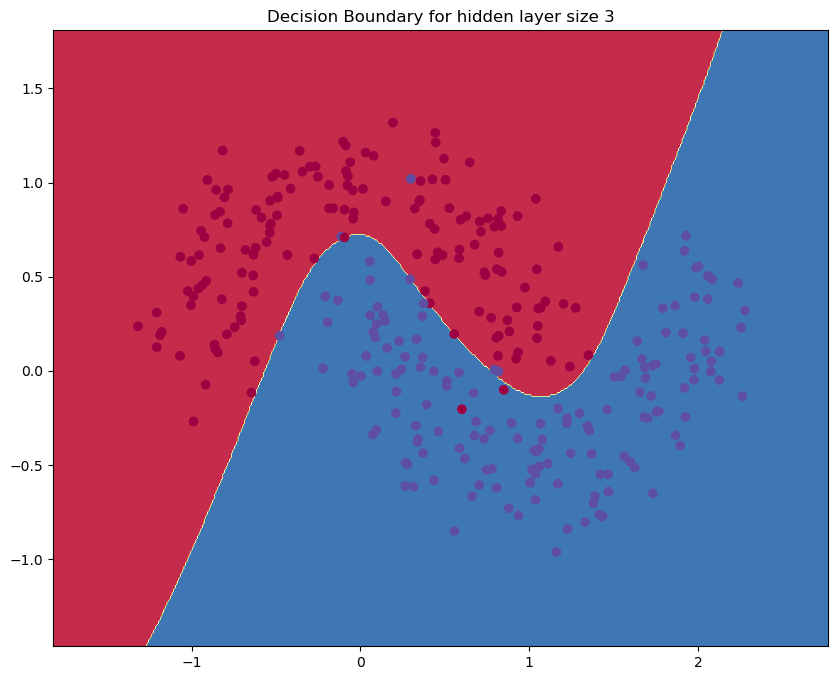

In [27]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

# Application on a real dataset

We will now apply our model on a real dataset well known in the world of Machine Learning : le MNIST (https://en.wikipedia.org/wiki/MNIST_database) which is on Sklearn.

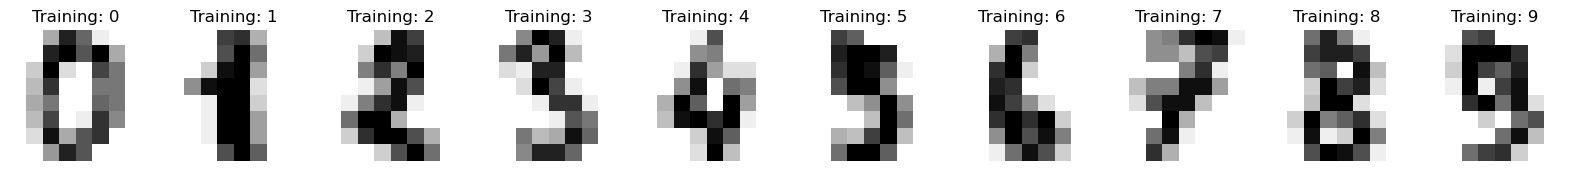

In [28]:
digits = sklearn.datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [29]:
X =  digits.images.reshape((n_samples, -1)) # We reshape the images into vector
y = digits.target

<font color='red'><b> Question 13 </b></font> Complete the input and output dimensions of your network so that it is adapted to the MNIST Dataset and restart the training (be careful, the training will now take a few minutes without additional code optimization).


In [30]:
N = len(X) 
d_input = len(X[0])
d_output = max(y)+1
d_hidden = 20 

# Gradient descent parameter
epsilon = 0.001 # le learning rate doit être plus petit qu'avant sinon l'entrainement diverge

In [ ]:
model = init_model(d_input, d_hidden, d_output)
model = train_model(model, d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))

Loss at epoch 0: 2.877707 Accuracy : 0.14802448525319978


<font color='red'><b> Question 14 </b></font> : 
Divide the MNIST dataset into training and validation datasets.
Find good hyper-parameters on your model. Why create a validation dataset?


<font color='red'><b> Question 14 Bonus </b></font> 
How can you ensure that your accuracy on the validation set is significantly different from that of the training set? Find such hyperparameters and plot the accuracy on the training set and on the validation set during the training of your network (according to the epochs). What do you observe?

<font color='red'><b> Questions 15 (Bonus) </b></font> There are many ways to make your neural network more efficient, you can find out about the following points of improvement of your choice, explain their usefulness and implement those you want by analyzing the new results obtained (on the game of data of your choice). Don’t hesitate to be curious and look for good resources to help you!

* UUsing the Numpy library to handle matrix operations, rather than using Python lists of lists (this will simplify your code and should reduce training times by several orders of magnitude depending on the size of your network, allowing you to to train larger networks and better optimize hyperparameters on the MNIST dataset)
* Add Weight Decay (https://fr.wikipedia.org/wiki/Weight_decay) 
* Stochastic or Batch Gradient Descent (https://fr.wikipedia.org/wiki/Algorithme_du_gradient_stochastique)
* Added more layers (make the number of layers a model parameter)